In [25]:
%run main.py play --agents q_agent --train 1 --scenario coin-heaven --n-rounds 2000 --no-gui

100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


Text(0, 0.5, 'total reward')

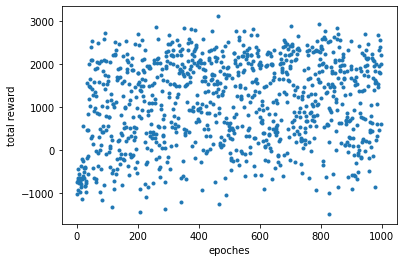

In [39]:
import numpy as np
import matplotlib.pyplot as plt
reward = np.load("agent_code/q_agent/rewards_04_02_2022_18_15_52.npy")
plt.plot(reward,'.')
plt.xlabel("epoches")
plt.ylabel("total reward")
#plt.xlim(0,200)


In [11]:
!python3 main.py play --agents q_agent q_agent q_agent q_agent --scenario classic --n-rounds 1

nonzero rows: 206
nonzero rows: 206
nonzero rows: 206
nonzero rows: 206
  0%|                                                     | 0/1 [00:00<?, ?it/s]features [0, 0, 1, 0, -1, -1] 

features [0, 0, -1, 1, 0, -1] 

features [0, 0, -1, -1, 1, 0] 

features [0, 0, 1, -1, -1, 0] 

features [0, 1, 1, -1, 0, -1] 

features [0, 1, -1, 1, -1, 0] 

features [0, 1, 0, -1, 1, -1] 

features [0, 0, 1, -1, 0, -1] 

features [2, 0, -1, -1, 2, -1] 

features [2, 0, -1, -1, -1, 2] 

features [2, 0, 1, -1, -1, -1] 

features [0, 1, 1, -1, 0, 1] 

features [2, 0, -1, 1, -1, -1] 

features [2, 0, -1, -1, 1, -1] 

features [2, 0, -1, -1, -1, 1] 

features [2, 0, -1, -1, 2, -1] 

features [0, 0, -1, 1, -1, 2] 

features [0, 1, 2, -1, 1, -1] 

features [0, 0, -1, 2, -1, 1] 

features [2, 0, -1, -1, 2, -1] 

features [0, 0, -1, 1, -1, 2] 

features [0, 1, 2, -1, 1, -1] 

features [0, 0, -1, 2, -1, 1] 

features [2, 0, 2, -1, -1, 1] 

features [0, 0, -1, 1, -1, -1] 

features [0, 1, -1, -1, 1, -1] 

feature

features [0, 0, 1, -1, -1, -1] 

features [0, 1, -1, 1, -1, 2] 

features [0, 1, -1, 0, -1, 1] 

features [2, 0, -1, -1, 2, -1] 

features [0, 0, 1, 0, 0, 0] 

features [0, 1, -1, 1, -1, -1] 

features [2, 0, -1, 2, -1, -1] 

features [2, 0, 2, 1, 2, 0] 

features [0, 0, 1, -1, 0, -1] 

features [0, 1, -1, 1, -1, 0] 

features [2, 0, 1, 2, 0, -1] 

features [3, 0, -1, 0, -1, 2] 

oscilation new features [3, 0, -1, 1, -1, 2] 

features [0, 0, 1, 0, 0, 0] 

features [0, 1, -1, 1, -1, 0] 

features [0, 1, 2, -1, -1, -1] 

features [3, 0, 1, 0, 0, 1] 

features [0, 0, 1, -1, 0, -1] 

features [2, 0, -1, -1, -1, 2] 

features [2, 0, 1, 2, 0, -1] 

features [3, 0, -1, 0, -1, 1] 

features [0, 1, 0, 0, 0, 1] 

features [2, 0, 1, -1, 0, 2] 

features [0, 0, -1, -1, 1, -1] 

features [3, 0, 1, 0, 0, 1] 

features [2, 0, 2, 2, 1, -1] 

features [1, 0, 2, -1, 0, -1] 

oscilation new features [0, 0, 2, -1, 1, -1] 

features [0, 0, 0, 0, 0, 1] 

features [0, 1, -1, 1, -1, 1] 

features [2, 0, -1, -

features [0, 0, -1, 0, -1, -1] 

oscilation new features [1, 0, -1, 1, -1, -1] 

features [1, 1, 1, -1, -1, -1] 

features [2, 0, 1, -1, -1, -1] 

features [0, 0, 0, 0, 0, 1] 

features [1, 1, 1, -1, 0, -1] 

features [2, 0, -1, 1, 2, 1] 

features [0, 0, -1, 0, -1, 1] 

features [0, 1, 1, 0, 0, 0] 

features [0, 1, -1, -1, -1, 1] 

features [3, 0, 1, 0, 0, 2] 

features [2, 0, 1, 2, 2, 2] 

features [0, 1, -1, 1, -1, 2] 

features [3, 0, 1, -1, 0, -1] 

features [2, 0, -1, 2, -1, -1] 

features [0, 1, -1, 1, -1, 2] 

features [3, 0, 1, 0, 1, 1] 

features [2, 0, 1, 2, 0, 2] 

features [1, 1, -1, 1, -1, 2] 

features [3, 0, -1, 0, -1, 2] 

oscilation new features [3, 0, -1, 1, -1, 2] 

features [3, 0, 2, -1, 2, -1] 

features [2, 0, -1, 1, -1, 2] 

features [3, 0, 0, 0, 0, 1] 

features [0, 1, 1, -1, -1, -1] 

features [2, 0, -1, 2, -1, -1] 

features [3, 0, -1, 0, -1, 2] 

oscilation new features [3, 0, -1, 1, -1, 2] 

features [3, 0, 2, -1, 0, -1] 

oscilation new features [1, 0, 2, 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0

features [0, 0, 0, -1, 0, -1] 

oscilation new features [1, 0, 0, -1, 1, -1] 

features [0, 0, -1, 0, -1, 0] 

oscilation new features [1, 0, -1, 0, -1, 1] 

features [0, 0, -1, 0, 0, 0] 

oscilation new features [1, 0, -1, 0, 0, 1] 

features [0, 0, 0, 0, 0, 0] 

oscilation new features [1, 0, 0, 0, 1, 0] 

  0%|                                                     | 0/1 [00:45<?, ?it/s]


In [118]:
bomb_area = np.array([[3, 3], [3, 2], [3, 1], [3, 5], [3, 6], [3, 7]])
print(bomb_area)
n = [np.array([2, 5]), np.array([3, 6]),np.array([4, 5]),np.array([3, 4])]
print(np.where([n_.tolist() in bomb_area.tolist() for n_ in n])[0])

[[3 3]
 [3 2]
 [3 1]
 [3 5]
 [3 6]
 [3 7]]
[1]


In [59]:
#--my-agents --save-replay --turn-based --save-stats

In [ ]:
!python main.py replay "replays/Round 07 (2022-03-23 12-52-13).pt" --turn-based

In [ ]:
reward = np.load("agent_code/q_agent/rewards.npy")
plt.plot(reward,'.')
plt.xlabel("rounds")
plt.ylabel("reward")
#plt.ylim(-100,100)

In [ ]:
model_trained = np.load("agent_code/q_agent/my-saved-model.npy")

In [17]:
import itertools
import numpy as np

v = [0,0, 1, -1,  1, -1]

NEIGHBOURING_FIELDS = [-1,0,1,2] # the possible values for neighbouring fields
GAME_MODE = [0,1,2,3] # the possible values for game mode
CURRENT_FIELD = [0,1,2,3] # the possible values for current filed
dic = {}

def get_arrangements(array):
    return [ np.roll(array, -i) for i in range(0,4) ]

# get all possible combinations
def get_variations(array, r=4):
    return [ item for item in list(itertools.product(array, repeat=r)) ]

# compute state to index for the Q-table
def build_state_to_index(arr1 = NEIGHBOURING_FIELDS, arr2 = GAME_MODE, arr3 = CURRENT_FIELD):
    i = 0
    perm = get_variations(arr1)
    comb = np.array(np.meshgrid(arr2, arr3)).T.reshape(-1,2) # combinations of arr2 and arr3
    step = len(comb)
    for p in perm:
        already_there = []
        arrangements = get_arrangements(p)
        for a in arrangements:
            if tuple(a) in dic.keys():
                already_there.append(True)
            else:
                already_there.append(False)
        if sum(already_there) == 0: # p not in dictionary
            value = [v for v in range(i, i+step)] # value indices for p
            i += step # update i
            dic.update({tuple(p) : value}) # add in dictionary

# give corresponding index and rotation from keys
def get_state_index(state):
    arrangements = get_arrangements(state[-4:]) # rotations of neighbouring fields
    mode_and_field = state[:2]
    value_index = 0
    comb = np.array(np.meshgrid(GAME_MODE, CURRENT_FIELD)).T.reshape(-1,2)
    for i, c in enumerate(comb):
        if (c == mode_and_field).all():
            value_index = i
            break
    for j, a in enumerate(arrangements):
        if tuple(a) in dic.keys():
            print(tuple(a), value_index)
            return dic[tuple(a)][value_index], j
    assert True == 0, state
            
build_state_to_index()
print(get_arrangements(v))
print(get_state_index(v))

[array([ 0,  0,  1, -1,  1, -1]), array([ 0,  1, -1,  1, -1,  0]), array([ 1, -1,  1, -1,  0,  0]), array([-1,  1, -1,  0,  0,  1])]
(-1, 1, -1, 1) 0
(400, 1)


In [7]:
import numpy as np
import random


In [9]:
def dist(pos, objects):
    return np.sqrt( np.power(np.subtract(objects, pos).transpose()[0], 2) + np.power(np.subtract(objects, pos).transpose()[1], 2) )

p = (1,1)
k = [[0,2], [1,2], [1,3], [2,1], [2,1], [1,1]]

distances = np.array(dist(p,k))
print(distances)
print(np.where(distances == min(distances)))

print(dist((4,1), (7,3)))

[1.41421356 1.         2.         1.         1.         0.        ]
(array([5]),)
3.605551275463989


In [36]:
pos = (0,0)
def get_neighbours(pos):
    sub = [(0,-1), (-1,0), (-2,0), (0,1)] # left, down, right, up

    neighbours = []
    for i in sub:
        neighbour = np.subtract(pos, i)
        if (0 <= neighbour[0] < 17) and (0 <= neighbour[1] < 17): # check if in game borders
            neighbours.append(neighbour)
    return neighbours

neigh = get_neighbours((1,1))
print(neigh)
neigh.append(np.array(pos))
print(neigh)

a = neigh[0]
print(a)
b = (a[0], a[1])
b = np.array(b)
neigh.append(b)
print(neigh)

[array([1, 2]), array([2, 1]), array([3, 1]), array([1, 0])]
[array([1, 2]), array([2, 1]), array([3, 1]), array([1, 0]), array([0, 0])]
[1 2]
[array([1, 2]), array([2, 1]), array([3, 1]), array([1, 0]), array([0, 0]), array([1, 2])]


In [27]:
pos = np.array((1,5))
area = [[1, 3], [1, 4], [1, 5], [1, 2]]
i = -1
for a in area:
    print(a, pos)
    i += 1
    if ((a == pos).all()):
        print(a, pos)
        break
print(i)

[1, 3] [1 5]
[1, 4] [1 5]
[1, 5] [1 5]
[1, 5] [1 5]
2


In [22]:
pos = (1,2)
pos1 = (1,2)
a = [1,2]
b = ((1,3), (1,2), (2,2))
c = any([(pos==b_) for b_ in b])

print(c)
print(pos!=b[2])
print(pos!=pos1)

True
True
False


In [23]:
mask = [[0]]
n = [[0,1],[1,2],[2,1],[1,0]]


In [24]:
n.append([pos[0], pos[1]])
print(n)

[[0, 1], [1, 2], [2, 1], [1, 0], [1, 2]]


In [49]:
a = np.array([5,6,3,2,1,1])
print(min(a))
i = np.where(a==min(a))
print(a[i])
print(1 in a[i])

1
[1 1]
True


In [62]:
A = np.array([[1, 4], [2, 5], [3, 6]])
B = np.array([[1, 4], [3, 6], [7, 8]])
aset = set([tuple(x) for x in A])
bset = set([tuple(x) for x in B])
intersection = np.array([x for x in aset & bset])
print(intersection)

[[1 4]
 [3 6]]


In [68]:
list1 = [(14, 3),(23, 41),(33, 62),(1, 3),(3, 3)]
list2 = [(14, 3),(23, 41),(34, 62),(2, 3),(5, 5)]
list3 = [item for item in list1 if item in list2]
print(list3)

[(14, 3), (23, 41)]


In [150]:
a = np.array([1, 3, 1, 7])
c = np.array([[0,1],[1,0],[0,0],[1,1]])
b = np.where(a!=1)
print(c)
d = [[0,1], [1,0], [0,0]]

k = np.where([d_ not in c for d_ in d])[0]
print(np.empty(k))

[[0 1]
 [1 0]
 [0 0]
 [1 1]]
1.8483715e-316


In [7]:
a = (1,1)
b = (1,1)
print(a!=b)

print(5 in [5])

False
True


In [2]:
a = 1
arr = [7,8,9,5]
print(a in arr)

False


In [6]:
from datetime import datetime

now = datetime.now() # current date and time

year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%H_%M_%S")
print("date and time:",date_time)

year: 2022
month: 04
day: 02
time: 14:54:15
date and time: 14_54_15


In [ ]:
import time
start = time.time()

time.sleep(5)
end  = time.time()
print(end-start)